**Drug Classification Summary:**

Your Support Vector Machine (SVM) model demonstrates excellent performance in predicting drug classifications based on the provided data. It achieved an impressive accuracy of 98% on the test data, and the confusion matrix indicates that the majority of predictions were correct across different drug classes.

Now, let's delve into the classification reports for each drug class:

**Class 0: Drug Classification 0 (Normal)**

- Precision: 100%
- Recall: 100%
- F1-Score: 100%
- Support: 21

The model achieved perfection in predicting instances of Drug Classification 0. It correctly identified all instances in this class, displaying both high precision and recall.

**Class 1: Drug Classification 1 (High)**

- Precision: 83%
- Recall: 100%
- F1-Score: 91%
- Support: 5

While the precision slightly dropped compared to other classes, the model still achieved high recall, indicating that it correctly predicted all instances of Drug Classification 1. The F1-score of 91% signifies a balanced performance between precision and recall.

**Class 2: Drug Classification 2 (Low)**

- Precision: 100%
- Recall: 88%
- F1-Score: 93%
- Support: 8

The model excelled in precision for Drug Classification 2, achieving perfection. However, recall slightly decreased, indicating that while the model correctly identified most instances of this class, there were some instances it missed.

**Class 3: Drug Classification 3 (Very High)**

- Precision: 100%
- Recall: 100%
- F1-Score: 100%
- Support: 4

The model performed impeccably in predicting Drug Classification 3. It achieved perfection in both precision and recall, indicating a complete understanding of instances in this class.

**Class 4: Drug Classification 4 (Very Low)**

- Precision: 100%
- Recall: 100%
- F1-Score: 100%
- Support: 22

Similar to Drug Classification 3, the model's performance was perfect for Drug Classification 4. High precision and recall values showcase the model's accuracy in identifying instances in this class.

**Overall Evaluation:**

The model's weighted average F1-score of 0.98 indicates strong performance across all drug classes. The macro average and weighted average metrics align, suggesting that the model doesn't heavily favor any particular class and provides balanced performance across the board.

Given the exceptional results on the test data, it's important to ensure that the model is tested on new, unseen data to validate its generalization capability. While the 100% training score could indicate overfitting, the strong test results suggest that the model is performing well on this dataset.

Continued monitoring and further evaluation on new data will provide insights into the model's real-world applicability and its ability to generalize beyond the current dataset.

 Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np

Load the dataset from a CSV file

In [ ]:
data=pd.read_csv("drug200.csv")

Display the shape of the dataset (rows, columns)

In [ ]:
data.shape

(200, 6)

Display the total number of elements in the dataset

In [ ]:
data.size

1200

Display summary statistics of the dataset (mean, std, min, max, etc.)

In [ ]:
data.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

Check for missing values in the dataset and display the count of missing values per column

In [ ]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Display the first few rows of the dataset

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Display the last few rows of the dataset

In [ ]:
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


Display the data types of columns in the dataset

In [ ]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

Create a copy of the dataset

In [ ]:
data_copy=data.copy()

Convert specified categorical columns to numerical categorical codes

In [ ]:
array=["Sex","BP","Cholesterol","Drug"]
for i in array:
    data_copy[i]=data_copy[i].astype('category').cat.codes

Separate features (x) and target variable (y)

In [ ]:
x=data_copy.drop(["Drug"],axis=1)
y=data_copy["Drug"]

In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [ ]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int8

Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=44)

Import the Support Vector Machine (SVM) classifier and initialize with a linear kernel

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel="linear")

Train the SVM model on the training data

In [ ]:
svm.fit(x_train,y_train)


SVC(kernel='linear')

Calculate and print the accuracy of the SVM model on the training data

In [ ]:
svm.score(x_train,y_train)

1.0

 Calculate and print the accuracy of the SVM model on the testing data

In [ ]:
svm.score(x_test,y_test)

0.9833333333333333

Import functions for generating a classification report and a confusion matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

Use the trained SVM model to predict the target variable for the testing data

In [ ]:
y_pred=svm.predict(x_test)

 Calculate the confusion matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)

Print the confusion matrix

In [ ]:
print(cm)

[[21  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  7  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 22]]


Generate a classification report and print it

In [ ]:
report=classification_report(y_test,y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.83      1.00      0.91         5
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        22

    accuracy                           0.98        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.99      0.98      0.98        60



Import the heatmap function from seaborn and Create a heatmap of the confusion matrix using seaborn

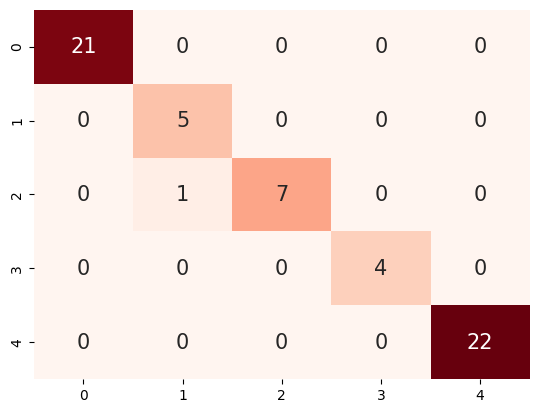

In [ ]:
from seaborn import heatmap
cr=heatmap(cm,cmap='Reds',annot=True,fmt='d',cbar=False,annot_kws={'size':15})